In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_gray_image(image, title = None):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    if title:
        plt.title(title)
    # plt.xticks([]), plt.yticks([])
    plt.show()


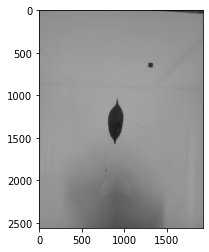

In [3]:
image_name = 'Coffee_1_pat_1cm_dist_40cm_MotoC.jpg'
filename, extension = image_name.split('.')

image = cv.imread('./images/teste/' + image_name)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

%matplotlib inline

plot_gray_image(image)

# Limiarização global

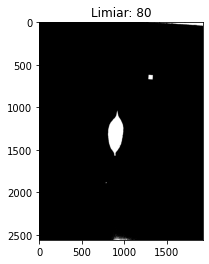

False

In [4]:
limiar = 80
ret, thresh = cv.threshold(image, limiar, 255, cv.THRESH_BINARY_INV)

plot_gray_image(thresh, "Limiar: " + str(limiar))

cv.imwrite('./teste/' + filename + '_mask.' + extension, thresh)

# Limiarização Otsu

Valor de threshold calculado:  125.0


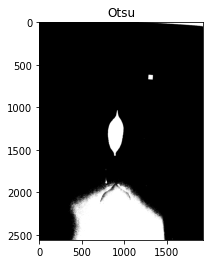

In [6]:
ret, otsu = cv.threshold(image, 127, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
print("Valor de threshold calculado: ", ret)

plot_gray_image(otsu, "Otsu")

# Thresholding adaptativo

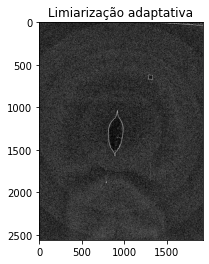

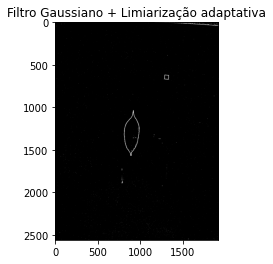

In [7]:
adaptive = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)  # t = m - C

gaussian_blur_image = cv.GaussianBlur(image, (7, 7), 0)
adaptive_gaussian_image = cv.adaptiveThreshold(gaussian_blur_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)

plot_gray_image(adaptive, "Limiarização adaptativa")
plot_gray_image(adaptive_gaussian_image, "Filtro Gaussiano + Limiarização adaptativa")

# Operações morfológicas

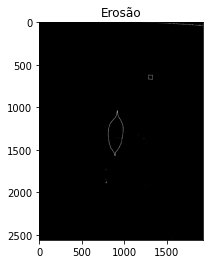

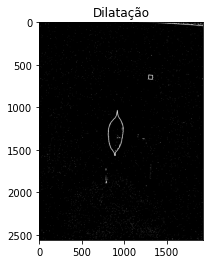

In [8]:
structuring_element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

erosion = cv.erode(adaptive_gaussian_image, structuring_element)
dilation = cv.dilate(adaptive_gaussian_image, structuring_element)

plot_gray_image(erosion, "Erosão")
plot_gray_image(dilation, "Dilatação")

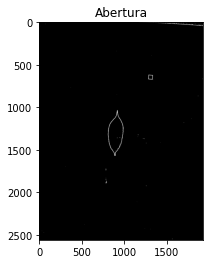

In [9]:
erosion_2 = cv.erode(adaptive_gaussian_image, structuring_element)
opening = cv.dilate(erosion_2, structuring_element)

plot_gray_image(opening, "Abertura")

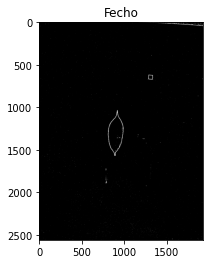

In [10]:
dilation_2 = cv.dilate(adaptive_gaussian_image, structuring_element)
close = cv.erode(dilation_2, structuring_element)

plot_gray_image(close, "Fecho")